# Connecting with external db

With agenticrag you don't even need to load your data, you can use it's powerful db connector that can connect with pretty much any SQL databases. You then can use SQLRetriever to retrieve data from database and use extracted .csv file for downstream tasks like question answering and chart generation.

In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [2]:
from agenticrag import RAGAgent, SQLRetriever, ChartGenerationTask

agent = RAGAgent(
    retrievers=[SQLRetriever()],
    tasks=[ChartGenerationTask()]
)

In [3]:
agent.connect_db(
    name="movie_rental_db",
    connection_url_env_var="DATABASE_URL" # You must set your DATABASE_URL in .env file
    # connection_url="your db connection url"  # OR You can also use this parameter directly
)

MetaData(id=None, format=<DataFormat.EXTERNAL_DB: 'external_db'>, name='movie_rental_db', description='This database appears to model a film rental business. It contains information about films, actors, categories, and languages. It also tracks customer data, store locations, staff details, and rental transactions including payments. Finally, geographic information like countries, cities, and addresses are included.', source='External Database')

RAGAgentResponse(success=True, content='The bar chart showing each category and its average length has been generated and saved. \n\n![Category Average Length Chart](.agenticrag_data/charts/category_average_length_chart.png)', iterations=2, datasets=[MetaData(id=5, format=<DataFormat.TABLE: 'table'>, name='Iris.csv', description='This dataset appears to describe measurements of Iris flowers. For each flower, it includes the sepal length and width, as well as the petal length and width, all measured in centimeters. The dataset also identifies the species of each Iris flower, allowing for analysis and comparison between different Iris species based on their physical characteristics.', source='data/Iris.csv'), MetaData(id=6, format=<DataFormat.EXTERNAL_DB: 'external_db'>, name='movie_rental_db', description='This database appears to model a film rental business. It contains information about films, actors, categories, and languages. It also tracks customer data, store locations, staff det

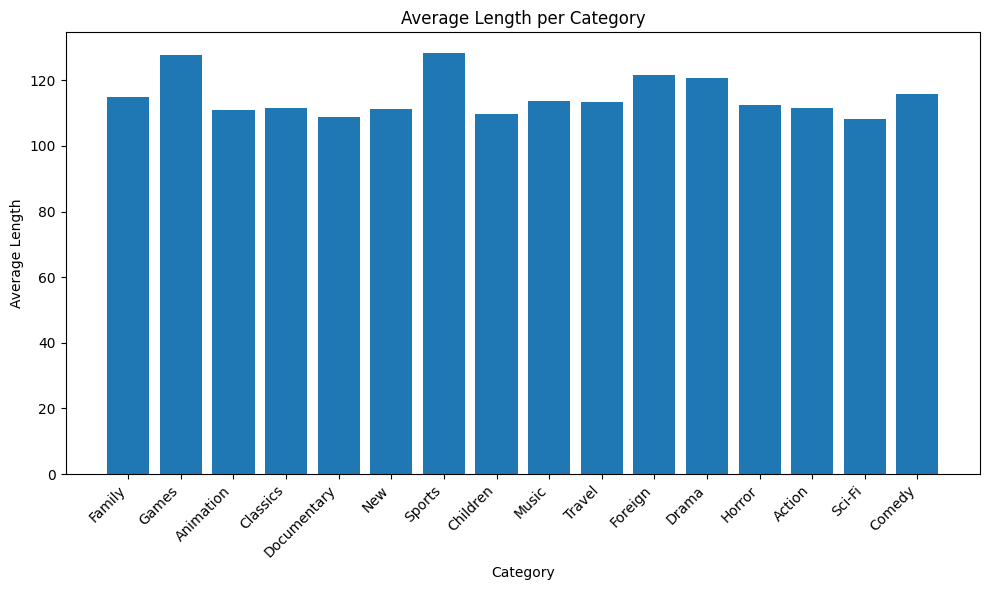

In [5]:
agent.invoke("Generate bar chart showing each category and average length")